# Week 11 - Introduction to Modeling, part 2

# 1. Lesson - No lesson this week

# 2. Weekly graph question

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, RepeatedKFold
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler

The book names one of Vonnegut's rules as "keep it simple" and another as "have the guts to cut."  Here is some data from the previous week's lesson.  If you had to cut one of the two plots below, which would it be?  Which seems more interesting or important?  Explain.  (Should "amount of training data used" or "number of estimators" be on the x-axis.)

In [2]:
np.random.seed(0)
num_points = 10000
feature_1a = np.random.random(size = num_points) * 3
feature_2a = np.random.random(size = num_points) * 3
feature_3a = np.random.random(size = num_points) * 3
train_target = (feature_1a - 2 * feature_2a) * feature_3a + np.random.normal(size = num_points)
feature_1b = np.random.random(size = num_points) * 3
feature_2b = np.random.random(size = num_points) * 3
feature_3b = np.random.random(size = num_points) * 3
test_target = (feature_1b - 2 * feature_2b) * feature_3b + np.random.normal(size = num_points)
train_df = pd.DataFrame({"f1": feature_1a, "f2": feature_2a, "f3": feature_3a})
test_df = pd.DataFrame({"f1": feature_1b, "f2": feature_2b, "f3": feature_3b})
rf = RandomForestRegressor()
rf.fit(train_df.values, train_target)

RandomForestRegressor()

In [3]:
rmse_lst = list()
rf = RandomForestRegressor()
for x in range(round(num_points / 20), num_points, round(num_points / 20)):
    rf.fit(train_df.values[0:x,:], train_target[0:x])
    rmse_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

import matplotlib.pyplot as plt

Text(0, 0.5, 'Loss function')

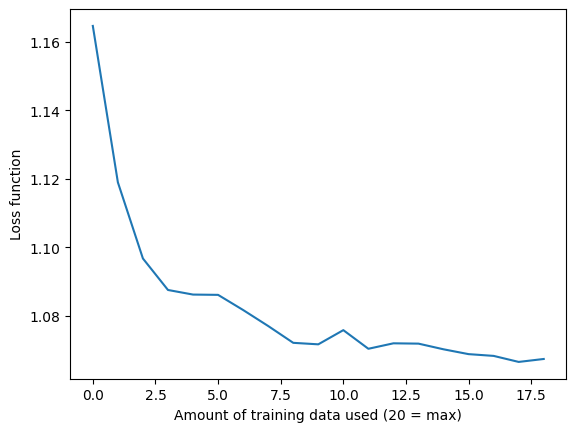

In [4]:
plt.plot(rmse_lst)
plt.xlabel("Amount of training data used (20 = max)")
plt.ylabel("Loss function")

In [5]:
num_trees_lst = list()
for n_estimators in range(1, 100, 3):
    rf = RandomForestRegressor(n_estimators = n_estimators)
    rf.fit(train_df.values, train_target)
    num_trees_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

Text(0, 0.5, 'Loss function')

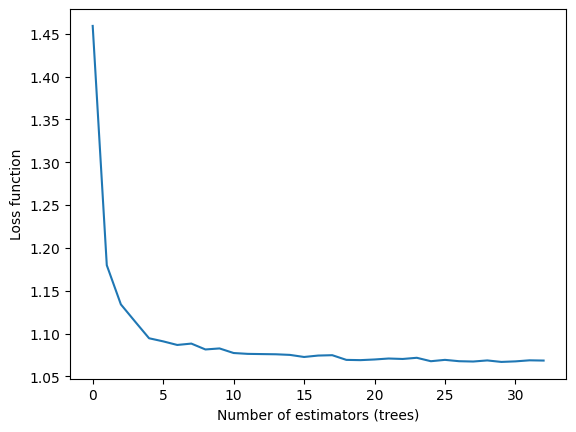

In [6]:
plt.plot(num_trees_lst)
plt.xlabel("Number of estimators (trees)")
plt.ylabel("Loss function")

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

Here are some types of analysis you can do:

* Implement a random forest model.
* Perform cross-validation.
* Tune hyperparameters.
* Evaluate a performance metric.

If you like, you can try other types of models, too (beyond linear regression and random forest) although you will have many opportunities to do that next semester.

In [7]:
df_ins = pd.read_csv('data/insurance_claims_cleaned.csv')

col_dict = {
        'object': ['policy_state', 'policy_csl', 'insured_sex',
            'insured_education_level', 'insured_occupation', 'insured_hobbies',
            'insured_relationship', 'incident_type',
            'collision_type', 'incident_severity', 'authorities_contacted',
            'incident_state', 'incident_city',
            'property_damage', 'police_report_available', 'auto_make',
            'auto_model'],
        'int64': ['months_as_customer', 'age', 'policy_number', 'policy_deductable',
            'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss',
            'incident_hour_of_the_day', 'number_of_vehicles_involved',
            'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim',
            'property_claim', 'vehicle_claim', 'auto_year', 'fraud_reported'],
        'float64': ['policy_annual_premium']
    }

pd.set_option('display.max_columns', None)
df_ins.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,?,Minor Damage,No authorities contacted,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,0


In [8]:
# Read the carclaims dataset
df_car = pd.read_csv('data/carclaims.csv')
df_car = df_car.drop(columns='PolicyNumber')

# Grab the categorical features of the dataset
cat_feat = df_car.select_dtypes(include='object')

df_car.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,"more than 69,000",12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,"more than 69,000",15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,"more than 69,000",7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,"20,000 to 29,000",4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,"more than 69,000",3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import datetime as dt
import time
from tqdm import tqdm

random_state = 0

In [10]:
def load_data(path, date_cols = None, col_dict = None, random_state = 0):
    df = pd.read_csv(path)
    # check if the dataset has been loaded properly
    if df.empty:
        raise ValueError("the dataset is empty, please check the path or the file content.")
    print(f"loaded dataset with shape: {df.shape}")

    if date_cols is not None:
        df[date_cols] = df[date_cols].apply(pd.to_datetime, errors='coerce')
        for col in date_cols:
            df[col] = pd.to_numeric(df[col])

    if col_dict is not None:
        for key in col_dict.keys():
            for col in col_dict[key]:
                if col in df.columns:
                    try:
                        df[col] = df[col].astype(key)
                    except ValueError:
                        print(f"Could not convert column {col} to type ")
    
    # Split the data into features and target variables
    X = df.drop(columns=[df.iloc[:, -1].name])
    y = df.iloc[:, -1]

    X = pd.get_dummies(X, drop_first=True)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=random_state
    )

    print(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")

    return X_train, X_test, y_train, y_test, df, X, y

In [11]:
X_train_ins, X_test_ins, y_train_ins, y_test_ins, df_ins, X_ins, y_ins = load_data('data/insurance_claims_cleaned.csv', col_dict=col_dict)

loaded dataset with shape: (1000, 35)
Training set shape: (800, 145), Testing set shape: (200, 145)


In [21]:
X_train_car, X_test_car, y_train_car, y_test_car, df_car, X_car, y_car = load_data('data/carclaims_cleaned.csv')

loaded dataset with shape: (15420, 32)
Training set shape: (12336, 123), Testing set shape: (3084, 123)


In [13]:
def run_model(model, x_train, y_train, x_test=None, y_test=None, test=False, n_repeats=5, n_jobs=-1, random_state=random_state, **model_params):

    # Instantiate the model if a class is provided, so for example can use either BaggingRegressor or BaggingRegressor() as argument. 
    if isinstance(model, type):
        model = model(**model_params)

    acc_scores = cross_val_score(model, x_train, y_train, scoring = 'accuracy',
                                     cv = RepeatedKFold(n_splits=5, n_repeats=n_repeats, random_state=random_state), n_jobs = n_jobs)
    
    mean_cv_score = np.mean(acc_scores)
    std_cv_score  = np.std(acc_scores)
    
    # Fit the model on the full training set
    model.fit(x_train, y_train)
    
    # Compute training RMSE
    if test:
        train_preds = model.predict(x_train)
        train_score = accuracy_score(y_train, train_preds)
        test_preds = model.predict(x_test)
        test_score = accuracy_score(y_test, test_preds)
    
        return mean_cv_score, std_cv_score, train_score, test_score
    
    else:
        train_preds = model.predict(x_train)
        train_score = accuracy_score(y_train, train_preds)

        return mean_cv_score, std_cv_score, train_score

In [14]:
def evaluate_model(
    models, 
    x_train, y_train, 
    x_test=None, y_test=None, 
    evaluate=False, 
    random_state=random_state, 
    **model_params
):

    results = {}

    for name, model in models.items():
        print(f"Evaluating {name}…")

        if evaluate:
            # run_model must accept x_test, y_test, test=True
            mean_cv_score, std_cv_score, train_score, test_score = run_model(
                model,
                x_train, y_train,
                x_test, y_test,
                test=True,
                random_state=random_state,
                **model_params
            )
        else:
            # only get the three training‐set metrics
            mean_cv_score, std_cv_score, train_score = run_model(
                model,
                x_train, y_train,
                x_test=None, y_test=None,
                test=False,
                random_state=random_state,
                **model_params
            )
            test_score = None

        # now format only the things you actually have
        row = {
            'Mean CV Score': mean_cv_score,
            'STD CV Score' : std_cv_score,
            'Train Score': train_score,
        }
        if evaluate:
            # guard against a still‐None test_rmse
            row['Test Score'] = test_score if test_score is not None else "N/A"

        results[name] = row

    df = pd.DataFrame(results).T
    df.index.name = 'Model'
    sort_col = 'Test Score' if evaluate else 'Mean CV Score'
    return df.sort_values(by=sort_col)


In [22]:
rf_ins = evaluate_model({'Random Forest': RandomForestClassifier()}, X_train_ins, y_train_ins, X_test_ins, y_test_ins, evaluate=False)
rf_ins

Evaluating Random Forest…


,Mean CV Score,STD CV Score,Train Score
Model,,,
Random Forest,0.766,0.034282,1.0


In [23]:
rf_car = evaluate_model({'Random Forest': RandomForestClassifier()}, X_train_car, y_train_car, X_test_car, y_test_car, evaluate=False)
rf_car

Evaluating Random Forest…


,Mean CV Score,STD CV Score,Train Score
Model,,,
Random Forest,0.940191,0.00462,1.0


In [24]:
def sweep_parameter(model,
                    Parameters,
                    param,
                    parameter_list,
                    x_train          = None,
                    y_train          = None,
                    verbose          = True,
                    show_score       = True,
                    n_iter_no_change = None,
                    delta            = 0.001):
    
    start = time.time()
    Param = Parameters.copy()  # Avoid modifying the original dictionary
    
    cv_scores, std_cvs, train_scores = [], [], []
    no_improve_count = 0
    best_score = float('inf')
    
    # Run over each value in parameter_list
    for p in tqdm(parameter_list, desc=f"Sweeping {param}"):
        Param[param] = p
        P_temp = Param.copy()
        # Remove MSE_found if present, just in case
        P_temp.pop('Score_found', None)
        
        cv_score, std_cv, train_score = run_model(
            model, x_train, y_train, **P_temp
        )
        
        cv_scores.append(cv_score)
        std_cvs.append(std_cv)
        train_scores.append(train_score)
        
        # Early-stopping logic
        if cv_score > best_score - delta:
            best_score = cv_score
            no_improve_count = 0
        else:
            no_improve_count += 1
        
        if n_iter_no_change is not None and no_improve_count >= n_iter_no_change:
            print(f"Early stopping: No improvement after {n_iter_no_change} iterations.")
            break
    
    # Identify best parameter
    max_cv_score = max(cv_scores)
    max_index = cv_scores.index(max_cv_score)
    best_param = parameter_list[max_index]
    Param[param] = best_param
    Param['Score_found'] = max_cv_score
    
    if verbose:
        # Prepare for plotting
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), sharex=True)
        
        # We only need as many parameter values as we actually computed
        partial_param_list = parameter_list[:len(cv_scores)]
        
        # Check if our parameter list is Boolean so we can label accordingly
        is_boolean = all(isinstance(val, bool) for val in partial_param_list)
        if is_boolean:
            # Convert booleans to integer indices for plotting
            x_vals = list(range(len(partial_param_list)))
            x_labels = [str(val) for val in partial_param_list]
        else:
            # Treat numeric or other types as-is
            x_vals = partial_param_list
            x_labels = partial_param_list
        
        error_name = 'Score'
        
        # ----- First plot: (R)MSE -----
        ax1.set_title(f"{error_name} vs {param}")
        
        # Plot lines
        ax1.plot(x_vals,
                 cv_scores,
                 marker='.', label=f"CV {error_name}", color='blue')
        # ax1.plot(x_vals,
        #          train_scores,
        #          marker='.', label=f"Train {error_name}", color='green')
        # ax1.plot(x_vals,
        #          test_scores,
        #          marker='-', label=f"Test {error_name}", color='yellow')
        ax1.scatter([x_vals[max_index]],
                    [max_cv_score],
                    marker='x', label=f"Best CV {error_name}", color='red')
        
        ax1.set_ylabel(error_name)
        ax1.legend()
        ax1.grid()
        
        # ----- Second plot: CV Std Dev -----
        ax2.set_title(f"CV Standard Deviation vs {param}")
        ax2.plot(x_vals, std_cvs, marker='.', label=f"CV {error_name} Std", color='blue')
        ax2.set_xlabel(param)
        ax2.set_ylabel("Standard Deviation")
        ax2.legend()
        ax2.grid(alpha=0.5)
        
        # If we are using boolean x-values, set custom ticks
        if is_boolean:
            ax2.set_xticks(x_vals)
            ax2.set_xticklabels(x_labels)
        
        plt.tight_layout()
        plt.show()
        
        end = time.time()
        print("Execution Time:", time.strftime("%H:%M:%S", time.gmtime(end - start)))
    
    return Param


In [25]:
Default_Parameters_Random_Forests = {
    'n_estimators': 100,
    'min_samples_split': 2,
    'max_depth'   : None,
    'bootstrap'   : True,
    'random_state': random_state,
    'Score_found'   : float('inf') 
}

In [26]:
Parameters_rf_ins = Default_Parameters_Random_Forests.copy()
Parameters_rf_ins_list = []

Sweeping n_estimators: 100%|██████████| 9/9 [00:09<00:00,  1.03s/it]


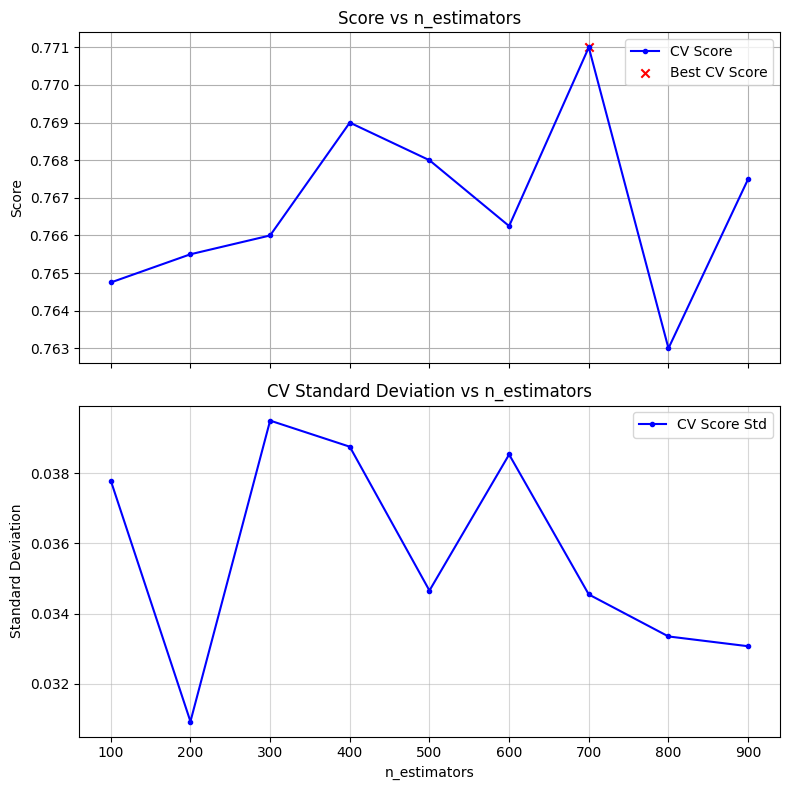

Execution Time: 00:00:09

Parameter n_estimators = 700; Accuracy = 0.7709999999999999

[]


Sweeping max_depth: 100%|██████████| 9/9 [00:09<00:00,  1.06s/it]


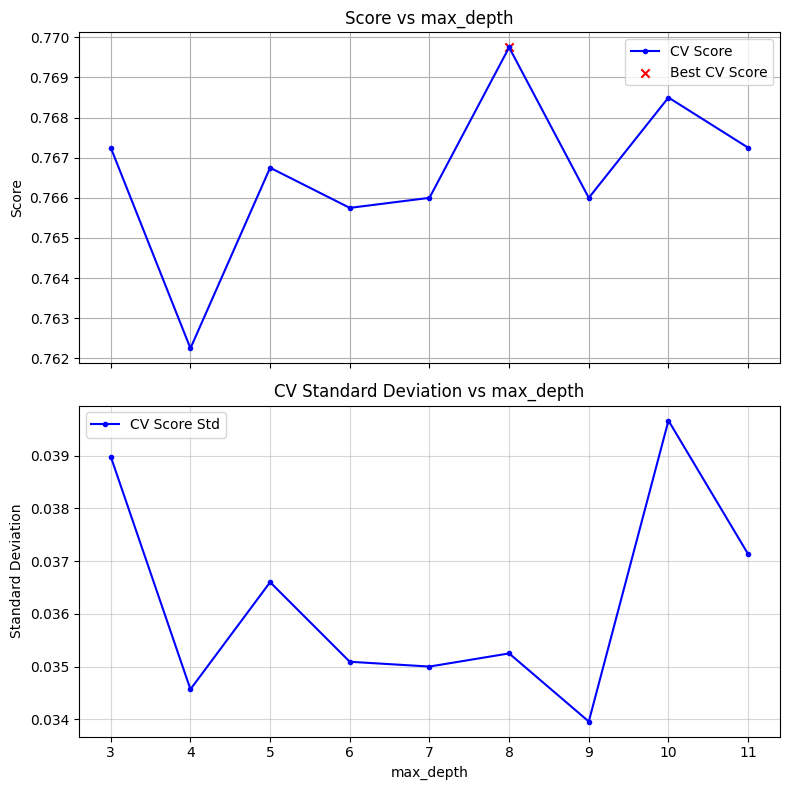

Execution Time: 00:00:09

Parameter max_depth = 8; Accuracy = 0.7697499999999999

[]


Sweeping min_samples_split: 100%|██████████| 8/8 [00:08<00:00,  1.05s/it]


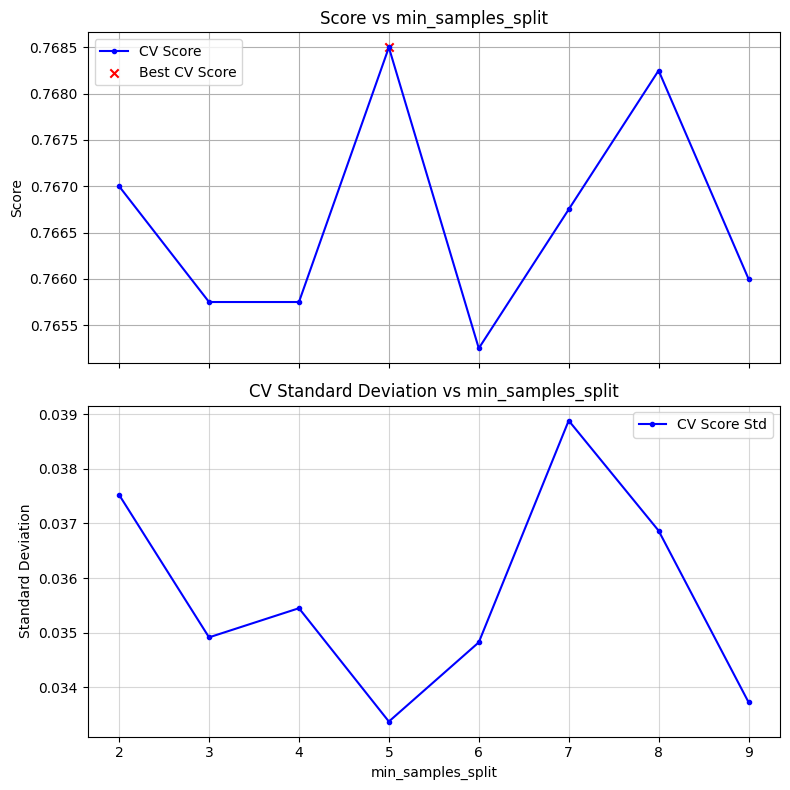

Execution Time: 00:00:08

Parameter min_samples_split = 5; Accuracy = 0.7685000000000001

[]


,n_estimators,min_samples_split,max_depth,bootstrap,random_state,Score_found
0,700,5,8,True,0,0.7685


In [27]:
# Sweep max features from random forest
parameters_and_ranges_rf = [
    ('n_estimators', range(100, 1000, 100)),
    ('max_depth', range(3, 12, 1)),
    ('min_samples_split', range(2,10,1))
    # ('bootstrap', [True]) 
]

for param, parameter_list in parameters_and_ranges_rf:
    Parameters_rf_ins = sweep_parameter(RandomForestClassifier(),
                                Parameters_rf_ins,
                                param,
                                parameter_list,
                                x_train  = X_train_ins,
                                y_train  = y_train_ins
                                )

    print(f'\nParameter {param} = {Parameters_rf_ins[param]}; Accuracy = {Parameters_rf_ins['Score_found']}\n')
    print(Parameters_rf_ins_list)

Parameters_rf_ins_list.append(Parameters_rf_ins)
pd.DataFrame(Parameters_rf_ins_list)

In [28]:
def run_grid_search(param_dict = None, x_train = None, y_train = None):

    # record beggining time
    start = time.time()

    # Define the parameter grid
    param_dist = param_dict.copy()

    # Initialize the RandomForestRegressor
    rf_classifier = RandomForestClassifier(random_state=0)

    # Set up GridSearchCV with repeated CV
    grid_search = GridSearchCV(estimator=rf_classifier,
                            param_grid=param_dist,
                            scoring='accuracy',
                            cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=42),
                            n_jobs= -1)

    # Fit the GridSearchCV
    grid_search.fit(x_train, y_train)

    # Extract results into a DataFrame
    results = grid_search.cv_results_

    # Sort indices
    sorted_indices = np.argsort(results['mean_test_score'])[::-1]

    print('Top 10 results:')
    for rank, idx in enumerate(sorted_indices[:10], start = 1):
        print(f"Rank {rank}: Params {results['params'][idx]}, Accuracy = {results['mean_test_score'][idx]}\n")

    # Record end time and print elapsed time
    end = time.time()
    print("Execution Time:", time.strftime("%H:%M:%S", time.gmtime(end - start)))

    return grid_search.best_params_, grid_search.best_estimator_

In [29]:
# Evaluate the best model on the test set
ins_best_params, ins_best_estimator = run_grid_search(
    param_dict = {
    'n_estimators': range(100, 1000, 100),
    'max_depth': range(3, 12, 1),
    'min_samples_split': range(2,10,1),
    'bootstrap': [True]
},
x_train = X_train_ins,
y_train = y_train_ins
)

evaluate_model({'Random Forest': ins_best_estimator}, X_train_ins, y_train_ins, X_test_ins, y_test_ins, evaluate=True)

Top 10 results:
Rank 1: Params {'bootstrap': True, 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}, Accuracy = 0.7725000000000001

Rank 2: Params {'bootstrap': True, 'max_depth': 10, 'min_samples_split': 7, 'n_estimators': 100}, Accuracy = 0.7725

Rank 3: Params {'bootstrap': True, 'max_depth': 10, 'min_samples_split': 3, 'n_estimators': 100}, Accuracy = 0.77

Rank 4: Params {'bootstrap': True, 'max_depth': 11, 'min_samples_split': 3, 'n_estimators': 100}, Accuracy = 0.76875

Rank 5: Params {'bootstrap': True, 'max_depth': 11, 'min_samples_split': 9, 'n_estimators': 200}, Accuracy = 0.76875

Rank 6: Params {'bootstrap': True, 'max_depth': 10, 'min_samples_split': 6, 'n_estimators': 100}, Accuracy = 0.76875

Rank 7: Params {'bootstrap': True, 'max_depth': 9, 'min_samples_split': 6, 'n_estimators': 100}, Accuracy = 0.76875

Rank 8: Params {'bootstrap': True, 'max_depth': 11, 'min_samples_split': 8, 'n_estimators': 100}, Accuracy = 0.76875

Rank 9: Params {'bootstrap': True,

,Mean CV Score,STD CV Score,Train Score,Test Score
Model,,,,
Random Forest,0.76425,0.037977,0.9525,0.73


In [30]:
Parameters_rf_car = Default_Parameters_Random_Forests.copy()
Parameters_rf_car_list = []

Sweeping n_estimators: 100%|██████████| 9/9 [00:53<00:00,  5.90s/it]


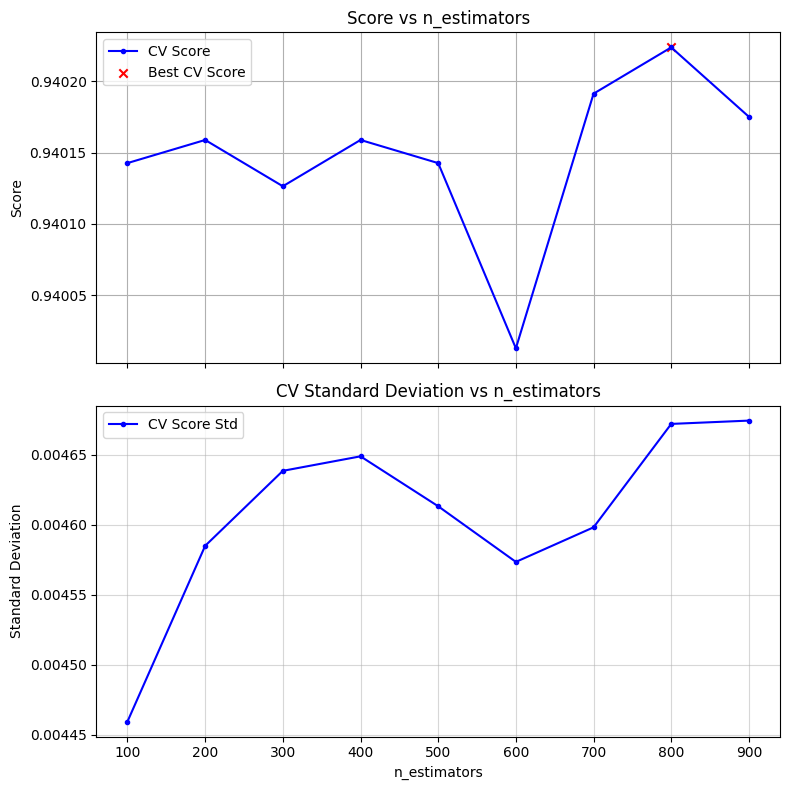

Execution Time: 00:00:53

Parameter n_estimators = 800; Accuracy = 0.9402236523734036

[]


Sweeping max_depth: 100%|██████████| 9/9 [00:52<00:00,  5.81s/it]


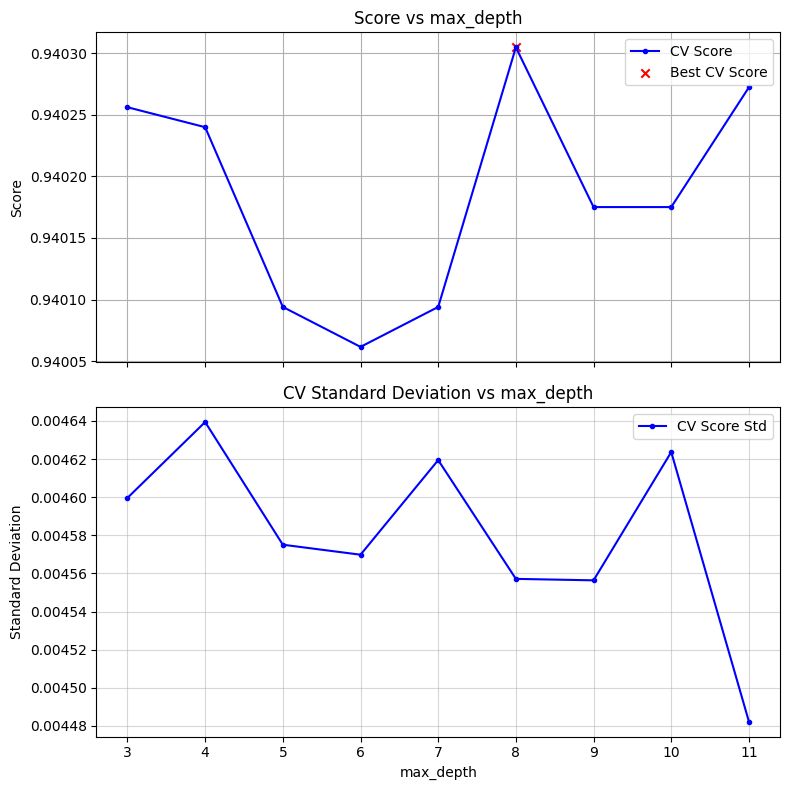

Execution Time: 00:00:52

Parameter max_depth = 8; Accuracy = 0.9403047356384668

[]


Sweeping min_samples_split: 100%|██████████| 8/8 [00:46<00:00,  5.79s/it]


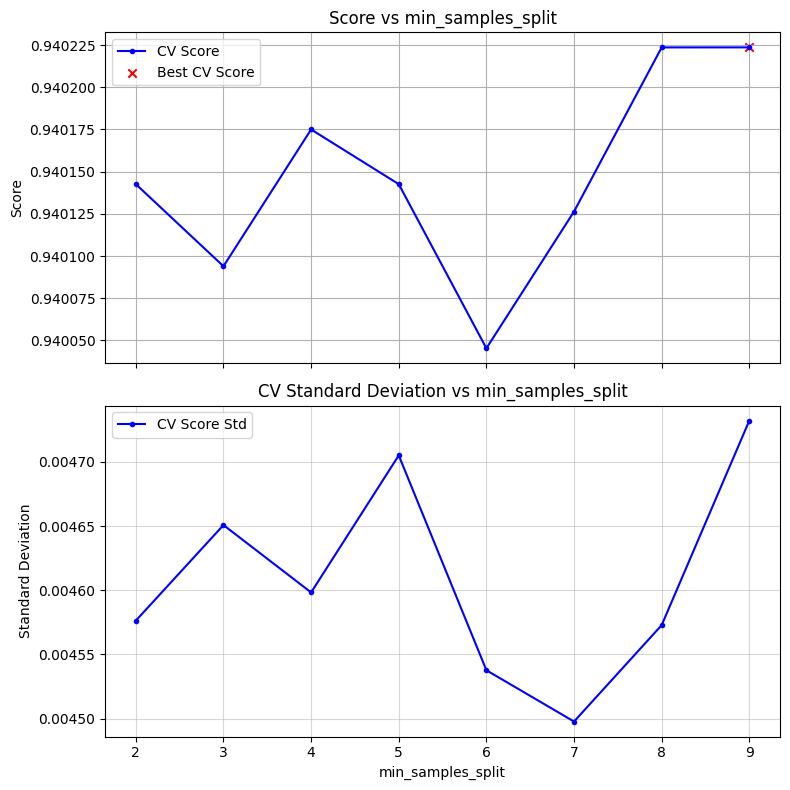

Execution Time: 00:00:46

Parameter min_samples_split = 9; Accuracy = 0.940223665512808

[]


,n_estimators,min_samples_split,max_depth,bootstrap,random_state,Score_found
0,800,9,8,True,0,0.940224


In [31]:
# Sweep max features from random forest
parameters_and_ranges_rf = [
    ('n_estimators', range(100, 1000, 100)),
    ('max_depth', range(3, 12, 1)),
    ('min_samples_split', range(2,10,1))
    # ('bootstrap', [True]) 
]

for param, parameter_list in parameters_and_ranges_rf:
    Parameters_rf_car = sweep_parameter(RandomForestClassifier(),
                                Parameters_rf_car,
                                param,
                                parameter_list,
                                x_train  = X_train_car,
                                y_train  = y_train_car
                                )

    print(f'\nParameter {param} = {Parameters_rf_car[param]}; Accuracy = {Parameters_rf_car['Score_found']}\n')
    print(Parameters_rf_car_list)

Parameters_rf_car_list.append(Parameters_rf_car)
pd.DataFrame(Parameters_rf_car_list)

In [32]:
# Evaluate the best model on the test set
car_best_params, car_best_estimator = run_grid_search(
    param_dict = {
    'n_estimators': range(100, 1000, 100),
    'max_depth': range(3, 12, 1),
    'min_samples_split': range(2,10,1),
    'bootstrap': [True]
},
x_train = X_train_car,
y_train = y_train_car
)

evaluate_model({'Random Forest': car_best_estimator}, X_train_car, y_train_car, X_test_car, y_test_car, evaluate=True)

Top 10 results:
Rank 1: Params {'bootstrap': True, 'max_depth': 11, 'min_samples_split': 2, 'n_estimators': 100}, Accuracy = 0.9400940715663945

Rank 2: Params {'bootstrap': True, 'max_depth': 10, 'min_samples_split': 8, 'n_estimators': 900}, Accuracy = 0.9400130014407357

Rank 3: Params {'bootstrap': True, 'max_depth': 9, 'min_samples_split': 5, 'n_estimators': 200}, Accuracy = 0.9400130014407357

Rank 4: Params {'bootstrap': True, 'max_depth': 9, 'min_samples_split': 5, 'n_estimators': 100}, Accuracy = 0.9400130014407357

Rank 5: Params {'bootstrap': True, 'max_depth': 9, 'min_samples_split': 4, 'n_estimators': 200}, Accuracy = 0.9400130014407357

Rank 6: Params {'bootstrap': True, 'max_depth': 11, 'min_samples_split': 9, 'n_estimators': 900}, Accuracy = 0.9400130014407357

Rank 7: Params {'bootstrap': True, 'max_depth': 11, 'min_samples_split': 9, 'n_estimators': 800}, Accuracy = 0.9400130014407357

Rank 8: Params {'bootstrap': True, 'max_depth': 11, 'min_samples_split': 9, 'n_estim

,Mean CV Score,STD CV Score,Train Score,Test Score
Model,,,,
Random Forest,0.93998,0.004659,0.943012,0.940986


# 4. Storytelling With Data plot

Reproduce any graph of your choice in chapter seven (p. 165-185) of the Storytelling With Data book as best you can. You do not have to get the exact data values right, just the overall look and feel.

No charts to reproduce this week!